In [17]:
import cv2

In [18]:
img=cv2.imread(r'C:\Users\gopik\OneDrive\Documents\Deep-Learning\eye_detection\pexels-heitorverdifotos-2169434.jpg')
img

array([[[181, 181, 181],
        [179, 179, 179],
        [177, 177, 177],
        ...,
        [161, 163, 157],
        [164, 166, 160],
        [165, 167, 161]],

       [[180, 180, 180],
        [179, 179, 179],
        [178, 178, 178],
        ...,
        [165, 167, 161],
        [167, 169, 163],
        [169, 171, 165]],

       [[177, 177, 177],
        [178, 178, 178],
        [179, 179, 179],
        ...,
        [168, 170, 164],
        [170, 172, 166],
        [171, 173, 167]],

       ...,

       [[161, 156, 157],
        [160, 155, 156],
        [159, 154, 155],
        ...,
        [146, 139, 130],
        [145, 138, 129],
        [145, 138, 129]],

       [[160, 155, 156],
        [159, 154, 155],
        [157, 152, 153],
        ...,
        [144, 137, 128],
        [143, 136, 127],
        [143, 136, 127]],

       [[160, 155, 156],
        [158, 153, 154],
        [156, 151, 152],
        ...,
        [142, 135, 126],
        [141, 134, 125],
        [141, 134, 125]]

In [19]:
import matplotlib.pyplot as plt

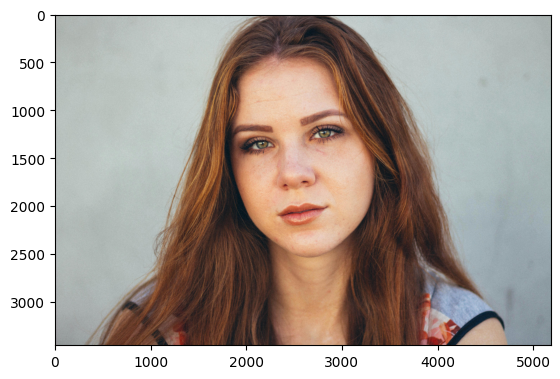

In [24]:
c_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(c_img)

In [20]:
eye_cascade=cv2.CascadeClassifier(r'C:\Users\gopik\OneDrive\Documents\Deep-Learning\eye_detection\haarcascade_eye.xml')

In [25]:
gray_img=cv2.cvtColor(c_img,cv2.COLOR_RGB2GRAY)

In [26]:
eyes=eye_cascade.detectMultiScale(gray_img,minNeighbors=20)
print(eyes)

[[2591 1063  375  375]
 [1944 1207  343  343]]


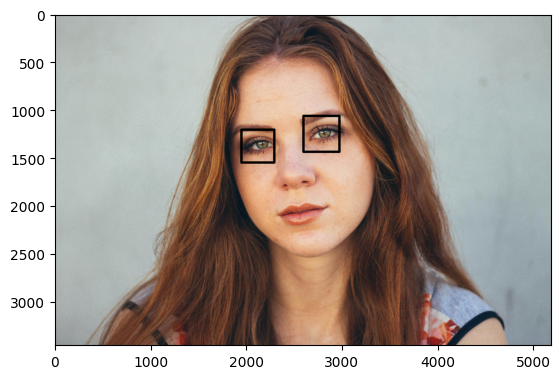

In [45]:
for (x,y,w,h) in eyes:
    cv2.rectangle(c_img,(x,y),(x+w,y+h),(0,0,0),24)
plt.imshow(c_img)

In [59]:
video=cv2.VideoCapture(r'C:\Users\gopik\OneDrive\Documents\Deep-Learning\eye_detection\4709886-uhd_4096_2160_25fps.mp4')
while True:
    success,frame=video.read()
    if not success:
        break
    w,h=frame.shape[1],frame.shape[0]
    sf=0.2
    n_w=int(sf*w)
    n_h=int(sf*h)
    frame=cv2.resize(frame,(n_w,n_h))
    gray=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,minNeighbors=30)
    for(x,y,w,h)in eyes:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(234,78,4),6)
    cv2.imshow('Video',frame)
    if cv2.waitKey(1)&0XFF==ord('q'):
        break
cv2.destroyAllWindows()


In [60]:
video=cv2.VideoCapture(0)
while True:
    success,frame=video.read()
    if not success:
        break
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,minNeighbors=1)
    for (x,y,w,h)in eyes:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(6,234,54),34)
    cv2.imshow('Webcam',frame)
    if cv2.waitKey(1)&0XFF==ord('q'):
        break
video.release()
cv2.destroyAllWindows()